# Trabajo Práctico 2 - Solana Cucher, Victoria Rosino, Florencia Ruiz

## Parte 1

**Inciso 2**

In [78]:
#Importamos la base de datos
import pandas as pd
df = pd.read_excel("usu_individual_T123.xlsx")
print(df.head(5))

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNORVWHLMKOCDEOHCH00720228  2023          1          1           5    0   
1  TQRMNOPSTHKMKPCDEOHCH00781447  2023          1          1           1    1   
2  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           1    1   
3  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           2    1   
4  TQRMNOQYTHMNKSCDEOHCH00803178  2023          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      44       N          91      112  ...     10.0        9   79700.0   
1      44       N          91      190  ...      6.0        5  180000.0   
2      44       N          91      134  ...      8.0        8  145000.0   
3      44       N          91      134  ...      8.0        8  145000.0   
4      44       N          91      120  ...     12.0       12       0.0   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH

In [79]:
#Inciso a): eliminamos las observaciones que no pertenezcan a CABA (32) o GBA (33)
df_aglomerados = df[(df["AGLOMERADO"]==32)|(df["AGLOMERADO"]==33)]
#Chequeamos el data frame 
print(df_aglomerados.head(15))

                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
102  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
103  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
104  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
105  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
106  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   
107  TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           1   
108  TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           2   
181  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           1   
182  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           2   
183  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           3   
278  TQRMNOTTTHKNLSCDEIIAD00780051  2023          1          1           1   
279  TQRMNOSRXHKMLUCDEIIAD00780093  2023          1          1  

Analizamos las variables de interés

**CH04** Sexo: 1 = Varón; 2 = Mujer

**CH06** ¿Cuántos años cumplidos tiene?

**CH07** ¿Actualmente está...; 1 = ... unido?; 2 = ... casado?; 3 = ... separado/a o divorciado/a?; 4 = ... viudo/a?; 5 = ... soltero/a?

**CH08** ¿Tiene algún tipo de cobertura médica por la que paga o le descuentan?: 1 = Obra social (incluye PAMI); 2 = Mutual / prepaga / servicio de emergencia; 3 = Planes y seguros públicos; 4 = No paga ni le descuentan; 9 = Ns/Nr; 12 = Obra social y mutual / prepaga / servicio de emergencia; 13 = Obra social y planes y seguros públicos; 23 = Mutual / prepaga / servicio de emergencia / Planes y seguros  públicos; 123 = Obra social, mutual / prepaga / servicio de emergencia y planes y  seguros públicos

**NIVEL_ED** Nivel educativo: 1 = Primario incompleto (incluye educación especial); 2 = Primario completo:
3 = Secundario incompleto; 4 = Secundario completo; 5 = Superior universitario incompleto; 6 = Superior universitario completo; 7 = Sin instrucción; 9 = Ns/Nr

**ESTADO** Condición de actividad: 0 = Entrevista individual no realizada  (no respuesta al cuestionario 
 individual); 1 = Ocupado; 2 = Desocupado; 3 = Inactivo; 4 = Menor de 10 años

**CAT_INAC** Categoría de inactividad: 1 = Jubilado / Pensionado; 2 = Rentista; 3 = Estudiante; 4 = Ama de casa; 5 = Menor de 6 años; 6 = Discapacitado; 7 = Otros

**IPCF** Monto de ingreso per cápita familiar 

**P47T** Monto de ingreso total individual (sumatoria ingresos laborales y no laborales)

**ITF** Monto del ingreso total familiar

**P21** Monto de ingreso de la ocupación principal


In [80]:
descrip_analysis = df_aglomerados[['CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','IPCF','P47T','ITF','P21']].describe()
print(descrip_analysis)

              CH04         CH06         CH07        CH08     NIVEL_ED  \
count  7619.000000  7619.000000  7619.000000  7618.00000  7619.000000   
mean      1.519359    37.177845     3.413703     2.22565     3.799842   
std       0.499658    22.738454     1.669771     1.94668     1.746307   
min       1.000000    -1.000000     1.000000     1.00000     1.000000   
25%       1.000000    18.000000     2.000000     1.00000     3.000000   
50%       2.000000    35.000000     4.000000     1.00000     4.000000   
75%       2.000000    55.000000     5.000000     4.00000     5.000000   
max       2.000000    99.000000     9.000000    12.00000     7.000000   

            ESTADO     CAT_INAC          IPCF          P47T           ITF  \
count  7619.000000  7619.000000  7.619000e+03  7.595000e+03  7.619000e+03   
mean      2.152776     1.445990  4.767827e+04  5.722302e+04  1.384079e+05   
std       1.149964     1.826504  9.256659e+04  1.590807e+05  3.349417e+05   
min       0.000000     0.000000  0

In [81]:
#Inciso b): A partir del análisis anteriro, descartamos las observaciones con valores absurdos 
# De las variables relacionadas a los ingresos eliminamos las observaciones con valores negativos. Lo mismo para la edad. 
# Las variables de estado civil (CH07) y cobertura médica (CH08) tienen observaciones que valen 9 y corresponde a No sabe/No responde
df_aglomerados = df_aglomerados[(df_aglomerados["P21"]>=0) & (df_aglomerados["P47T"]>=0) & (df_aglomerados["CH06"]>=0) & (df_aglomerados["CH07"]!=9) & (df_aglomerados["CH08"]!=9)]
#Chequemos de vuelta la estadística descriptiva para ver si se borarron esas observaciones absurdas. 
descrip_analysis2 = df_aglomerados[['CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','IPCF','P47T','ITF','P21']].describe()
print(descrip_analysis2)

              CH04         CH06         CH07         CH08     NIVEL_ED  \
count  5942.000000  5942.000000  5942.000000  5942.000000  5942.000000   
mean      1.533322    34.800067     3.520364     2.213901     3.681084   
std       0.498930    23.097834     1.663040     1.893705     1.793058   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000    15.000000     2.000000     1.000000     2.000000   
50%       2.000000    32.000000     5.000000     1.000000     4.000000   
75%       2.000000    52.000000     5.000000     4.000000     5.000000   
max       2.000000    99.000000     5.000000    12.000000     7.000000   

            ESTADO     CAT_INAC          IPCF          P47T           ITF  \
count  5942.000000  5942.000000  5.942000e+03  5.942000e+03  5.942000e+03   
mean      2.350050     1.740323  6.071591e+04  7.304394e+04  1.758968e+05   
std       1.134744     1.886545  1.008592e+05  1.766055e+05  3.699772e+05   
min       1.000000     0.

Mujeres    3169
Varones    2773
Name: CH04, dtype: int64


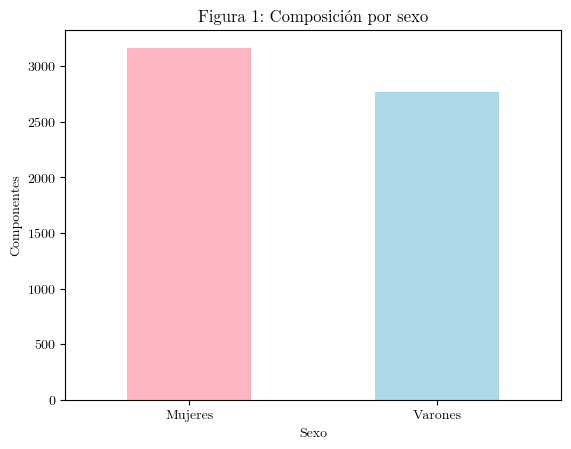

In [82]:
#Inciso c): realizamos un gráfico de barras mostrando la composición por sexo
import matplotlib.pyplot as plt
font = {'family': 'Latin Modern Math'}
plt.rc('font', **font)
#Creamos un data frame auxiliar para graficar 
sexo_labels = {1:"Varones", 2:"Mujeres"}
sexo_counts = df_aglomerados["CH04"].map(sexo_labels).value_counts()
print(sexo_counts.head(5))
#Realizamos el gráfico
ax = sexo_counts.plot(kind="bar", title= "Composición por sexo")
ax.set_xlabel("Sexo")
ax.set_ylabel("Componentes")
colores = ['lightpink', 'lightblue']
ax = sexo_counts.plot(kind="bar", title="Figura 1: Composición por sexo", color=colores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.savefig("sexo.png", dpi=300, bbox_inches='tight')

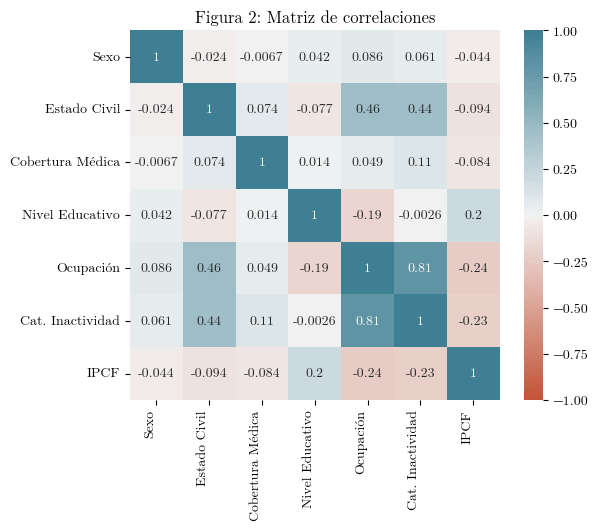

In [115]:
#Inciso d): Realizamos una matriz de correlación
import seaborn as sns
import numpy as np 
#Creamos un data frame con las variables que luego van a estar en la matriz de correlación
df_d = df_aglomerados[["CH04", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]].copy()


corr = df_d.corr()
ax = sns.heatmap(
    corr, 
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
etiquetas = ['Sexo', 'Estado Civil', 'Cobertura Médica', 'Nivel Educativo', 'Ocupación', 'Cat. Inactividad', 'IPCF']

ax.set_xticklabels(etiquetas,
    rotation=90,
    horizontalalignment='right',
    fontsize=10
)
ax.set_yticklabels(etiquetas,
    rotation=0,
    horizontalalignment='right',
    fontsize=10
)
plt.title("Figura 2: Matriz de correlaciones")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')


In [84]:
#Inciso e): contamos la cantidad de desocupados e inactivos en la muestra 
ocupacion_counts = df_aglomerados["ESTADO"].value_counts()
print(ocupacion_counts)
#Resultados: tenemos en nuestra base de datos a 264 personas desocupadas y 2540 personas inactivas

#Calculamos el ingreso per cápita familiar promedio por estado ocupacional
promedio_por_ocupacion = df_aglomerados.groupby("ESTADO")["IPCF"].mean()
print(promedio_por_ocupacion)

print(f"La media del ingreso per cápita familiar para los ocupados es $93.268, la de desocupados $27.664 y la de inactivos $44.797")


3    2529
1    2249
4     900
2     264
Name: ESTADO, dtype: int64
ESTADO
1    93268.953931
2    27664.024053
3    44797.115382
4    33796.509633
Name: IPCF, dtype: float64
La media del ingreso per cápita familiar para los ocupados es $93.268, la de desocupados $27.664 y la de inactivos $44.797


In [85]:
#Inciso f): trabajamos la base de datos "tabla_adultos_equiv.xlsx" como indica la consigna
df_adultos = pd.read_excel("tabla_adulto_equiv.xlsx",skiprows=3,nrows=24) 
df_adultos.drop(0, inplace = True)

#Reseteamos el índice 
df_adultos.reset_index(drop=True,inplace=True)

#Definimos las unidades de adulto equivalente para las edades que están agrupadas 
for i in range(0,18):
    df_adultos.loc[i,"Edad"]= i 
#De 18 a 29 años le atribuímos el valor 0.76 a las mujeres y 1.02 a los hombres
for i in range(18,30): 
    df_adultos.loc[i]= [i,0.76,1.02] 
#De 30 a 45 años le atribuímos el valor 0.77 a las mujeres y 1 a los hombres
for i in range(30,46): 
    df_adultos.loc[i]= [i,0.77,1] 
#De 46 a 60 años le atribuímos el valor 0.76 a las mujeres y 1 a los hombres
for i in range(46,61):
    df_adultos.loc[i]= [i,0.76,1] 
#De 61 a 75 años le atribuímos el valor 0.67 a las mujeres y 0.83 a los hombres
for i in range(61,76): 
    df_adultos.loc[i]= [i,0.67,0.83]
#A los mayores de 75 años le atribuímos el valor 0.63 a las mujeres y 0.74 a los hombres
for i in range(76,106): 
    df_adultos.loc[i]= [i,0.63,0.74] 

df_adultos = df_adultos.rename(columns={"Edad":"CH06"})
print(df_adultos)

#Armamos una base de datos para las mujeres y otras para los varones
df_equiv_mujeres = df_adultos[["CH06","Mujeres"]].copy()
df_equiv_mujeres["CH04"] = 2 #El 2 implica que son mujeres según la variable CH04 de la EPH
df_equiv_mujeres = df_equiv_mujeres.rename(columns={"Mujeres":"adulto_equiv"})

df_equiv_varones = df_adultos[["CH06","Varones"]].copy()
df_equiv_varones["CH04"] = 1 #El 1 implica que son varones según la variable CH04 de la EPH
df_equiv_varones = df_equiv_varones.rename(columns={"Varones":"adulto_equiv"})

#Unimos las dos bases creadas anteriormente. Luego juntamos la nueva base con la EPH
df_equiv_total = df_equiv_mujeres.append(df_equiv_varones)
df_aglomerados_merge = df_aglomerados.merge(df_equiv_total, on=["CH06","CH04"], how = "left")
#Chequeamos que haya dado bien
print(df_aglomerados_merge[["CH06","CH04","adulto_equiv"]].head(10))

#Sumamos la nueva columna "adulto_equiv" para todas las personas que pertenecen al mismo hogar
df_aglomerados_suma = df_aglomerados_merge.groupby(["NRO_HOGAR","CODUSU"]).agg({"adulto_equiv":"sum"})
df_aglomerados_suma.reset_index(inplace = True)
df_aglomerados_suma = df_aglomerados_suma.rename(columns={"adulto_equiv":"ad_equiv_hogar"})
df_aglomerados_final = df_aglomerados_merge.merge(df_aglomerados_suma, on=["NRO_HOGAR","CODUSU"], how = "left")

      CH06  Mujeres  Varones
0        0     0.35     0.35
1        1     0.37     0.37
2        2     0.46     0.46
3        3     0.51     0.51
4        4     0.55     0.55
..     ...      ...      ...
101  101.0     0.63     0.74
102  102.0     0.63     0.74
103  103.0     0.63     0.74
104  104.0     0.63     0.74
105  105.0     0.63     0.74

[106 rows x 3 columns]
  CH06  CH04  adulto_equiv
0   65     2          0.67
1   70     1          0.83
2   36     1          1.00
3   28     2          0.76
4    9     2          0.69
5   59     1          1.00
6   55     1          1.00
7   18     1          1.02
8   44     1          1.00
9   10     2          0.70


/var/folders/gs/bbp_k7n56dgg1t__lzbv4f300000gp/T/ipykernel_96926/4258798631.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_equiv_total = df_equiv_mujeres.append(df_equiv_varones)


**Inciso 3**

In [86]:
#Encontramos a las personas que no respondieron cual es su ITF y los diferenciamos en otra base de datos
cantidad_missing = (df_aglomerados_final["ITF"] == 0).sum()
print("La cantidad de personas que no reportaron su ITF es",cantidad_missing)
#Hacemos una base con las personas que reportaron su ITF y otra con las que no lo hicieron
respondieron = df_aglomerados_final[df_aglomerados_final["ITF"]!= 0]
norespondieron = df_aglomerados_final[df_aglomerados_final["ITF"]== 0]
#Chequeamos que los dataframes se hayan creado correctamente y reseteamos su índice
respondieron.reset_index(inplace = True)
norespondieron.reset_index(inplace = True)
print(respondieron["ITF"].head(5))
print(norespondieron["ITF"].head(5))

La cantidad de personas que no reportaron su ITF es 1769
0    135000
1    135000
2     70000
3     70000
4     70000
Name: ITF, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: ITF, dtype: int64


**Inciso 4**

In [87]:
#Agregamos la columna de "ingreso necesario" al Data Frame de "respondieron"
respondieron["ingreso_necesario"] = respondieron["ad_equiv_hogar"]*(57371.05)

/var/folders/gs/bbp_k7n56dgg1t__lzbv4f300000gp/T/ipykernel_96926/4102786844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["ingreso_necesario"] = respondieron["ad_equiv_hogar"]*(57371.05)


**Inciso 5**

In [88]:
#Generamos una columna nueva llamada "pobre" para identificar a aquellos que no alcanzan el ingreso necesario
respondieron["pobre"] = (respondieron["ITF"] < respondieron["ingreso_necesario"]).astype(int)
print(respondieron[["ITF","ingreso_necesario","pobre"]])

#Contamos el número de pobres que hay en el Data Frame "respondieron"
cantidad_pobres = respondieron["pobre"].value_counts()
cantidad_pobres = cantidad_pobres.get(1, 0)
print("La cantidad de pobres es",cantidad_pobres)

#Calculamos la proporción de pobres sobre el total 
pobres_prop=cantidad_pobres/len(respondieron)
print("La tasa pobreza en esta muestra es de:", round(pobres_prop*100,2), "%")


         ITF  ingreso_necesario  pobre
0     135000         86056.5750      0
1     135000         86056.5750      0
2      70000        140559.0725      1
3      70000        140559.0725      1
4      70000        140559.0725      1
...      ...                ...    ...
4168  155000        219157.4110      1
4169  480000        141132.7830      0
4170  480000        141132.7830      0
4171  480000        141132.7830      0
4172  254000         36143.7615      0

[4173 rows x 3 columns]
La cantidad de pobres es 1555
La tasa pobreza en esta muestra es de: 37.26 %


/var/folders/gs/bbp_k7n56dgg1t__lzbv4f300000gp/T/ipykernel_96926/2044747119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["pobre"] = (respondieron["ITF"] < respondieron["ingreso_necesario"]).astype(int)


## Parte 2

**Inciso 1**

In [89]:
#Eliminamos todas las variables relacionadas a ingresos de las dos bases de datos 
columnas_ingresos = ["P21","PP08D1","PP08D4","PP08F1","PP08F2","PP08J1","PP08J2","PP08J3","DECOCUR","IDECOCUR","RDECOCUR","GDECOCUR","PDECOCUR","ADECOCUR","PONDIIO","TOT_P12","P47T","DECINDR","IDECINDR","RDECINDR","GDECINDR","PDECINDR","ADECINDR","PONDII","V2_M","V3_M","V4_M","V5_M","V8_M","V9_M","V10_M","V11_M","V12_M","V18_M","V21_M","V19_AM","T_VI","ITF","DECIFR","IDECIFR","RDECIFR","GDECIFR","PDECIFR","ADECIFR","IPCF","DECCFR","IDECCFR","RDECCFR","GDECCFR","ADECCFR","PDECCFR","PONDIH"]
respondieron_2 = respondieron.drop(columnas_ingresos, axis=1)
norespondieron_2 = norespondieron.drop(columnas_ingresos, axis=1)
#Eliminar columnas adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron_2 = respondieron_2.drop(["adulto_equiv","ad_equiv_hogar","ingreso_necesario"], axis=1)
norespondieron_2 = norespondieron_2.drop(["adulto_equiv","ad_equiv_hogar"], axis=1)

**Inciso 2**

In [90]:
#Obtenemos el nombre de todas las columnas del data frame y borramos aquellas que no son numéricas para poder correr la regresión
tipos = respondieron_2.dtypes
for columna, tipo in tipos.items():
    print(f"Columna '{columna}': {tipo}") 

#Las variables no numericas que borramos son CODUSU, MAS_500 y CH05.
columnas_a_eliminar = ['CODUSU', 'MAS_500', 'CH05']
respondieron_2 = respondieron_2.drop(columns=columnas_a_eliminar)
norespondieron_2 = norespondieron_2.drop(columns=columnas_a_eliminar)

Columna 'index': int64
Columna 'CODUSU': object
Columna 'ANO4': int64
Columna 'TRIMESTRE': int64
Columna 'NRO_HOGAR': int64
Columna 'COMPONENTE': int64
Columna 'H15': int64
Columna 'REGION': int64
Columna 'MAS_500': object
Columna 'AGLOMERADO': int64
Columna 'PONDERA': int64
Columna 'CH03': int64
Columna 'CH04': int64
Columna 'CH05': object
Columna 'CH06': object
Columna 'CH07': int64
Columna 'CH08': float64
Columna 'CH09': int64
Columna 'CH10': int64
Columna 'CH11': int64
Columna 'CH12': int64
Columna 'CH13': int64
Columna 'CH14': float64
Columna 'CH15': int64
Columna 'CH15_COD': float64
Columna 'CH16': int64
Columna 'CH16_COD': float64
Columna 'NIVEL_ED': int64
Columna 'ESTADO': int64
Columna 'CAT_OCUP': int64
Columna 'CAT_INAC': int64
Columna 'IMPUTA': float64
Columna 'PP02C1': int64
Columna 'PP02C2': int64
Columna 'PP02C3': int64
Columna 'PP02C4': int64
Columna 'PP02C5': int64
Columna 'PP02C6': int64
Columna 'PP02C7': int64
Columna 'PP02C8': int64
Columna 'PP02E': int64
Columna 'PP

In [91]:
#Borramos también las columnas con muchos missing values
missing_values = respondieron_2.isna().sum()
for columna, missing_values in missing_values.items():
    print(f"Columna '{columna}': {missing_values}") 
respondieron_2 = respondieron_2.dropna(axis=1)

missing_values = norespondieron_2.isna().sum()
for columna, missing_values in missing_values.items():
    print(f"Columna '{columna}': {missing_values}")  
norespondieron_2 = norespondieron_2.dropna(axis=1)

Columna 'index': 0
Columna 'ANO4': 0
Columna 'TRIMESTRE': 0
Columna 'NRO_HOGAR': 0
Columna 'COMPONENTE': 0
Columna 'H15': 0
Columna 'REGION': 0
Columna 'AGLOMERADO': 0
Columna 'PONDERA': 0
Columna 'CH03': 0
Columna 'CH04': 0
Columna 'CH06': 0
Columna 'CH07': 0
Columna 'CH08': 0
Columna 'CH09': 0
Columna 'CH10': 0
Columna 'CH11': 0
Columna 'CH12': 0
Columna 'CH13': 0
Columna 'CH14': 2098
Columna 'CH15': 0
Columna 'CH15_COD': 3374
Columna 'CH16': 0
Columna 'CH16_COD': 4105
Columna 'NIVEL_ED': 0
Columna 'ESTADO': 0
Columna 'CAT_OCUP': 0
Columna 'CAT_INAC': 0
Columna 'IMPUTA': 4159
Columna 'PP02C1': 0
Columna 'PP02C2': 0
Columna 'PP02C3': 0
Columna 'PP02C4': 0
Columna 'PP02C5': 0
Columna 'PP02C6': 0
Columna 'PP02C7': 0
Columna 'PP02C8': 0
Columna 'PP02E': 0
Columna 'PP02H': 0
Columna 'PP02I': 0
Columna 'PP03C': 2339
Columna 'PP03D': 2339
Columna 'PP3E_TOT': 2339
Columna 'PP3F_TOT': 2339
Columna 'PP03G': 2339
Columna 'PP03H': 2339
Columna 'PP03I': 2339
Columna 'PP03J': 2339
Columna 'INTENSI

In [92]:
#Partimos la base "respondieron" en una parte de entrenamiento y otra parte de prueba
import statsmodels.api as sm
y = respondieron_2["pobre"]
x = respondieron_2[respondieron_2.columns.drop("pobre")]
x = sm.add_constant(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.loc[:,x.columns!="const"],y,test_size=0.3,random_state=201)
#Chequeamos la partición de las bases de prueba y entrenamiento
print("La base x de prueba tiene el",round(len(x_test)/len(respondieron_2)*100), "% de los datos") 
print("La base x de entrenamiento tiene el", round(len(x_train)/len(respondieron_2)*100),  "% de los datos")  
print("La base y de prueba tiene el",round(len(y_test)/len(respondieron_2)*100), "% de los datos") 
print("La base y de entrenamiento tiene el", round(len(y_train)/len(respondieron_2)*100),  "% de los datos")

La base x de prueba tiene el 30 % de los datos
La base x de entrenamiento tiene el 70 % de los datos
La base y de prueba tiene el 30 % de los datos
La base y de entrenamiento tiene el 70 % de los datos


**Inciso 3**

In [93]:
#Realizamos la curva ROC y los valores de AUC y de Accuracy. Luego computamos la matriz de confusión.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

Logit

In [94]:
#Ajustamos el clasificador con el método fit() y hacemos las predicciones de probabilidad 
reg_logistica = LogisticRegression().fit(x_train,y_train)
pred_y_score = reg_logistica.predict_proba(x_test)[:,1]  

#Transformamos las probabilidades en Y con valores 1 o 0 (con el clasificador de Bayes)
y_predicha = np.where(pred_y_score > 0.5, 1, pred_y_score)
y_predicha = np.where(pred_y_score <= 0.5, 0, y_predicha)

/Users/Victoria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
#Generamos la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_predicha)

print('Confusion Matrix:')
print(matriz_confusion) 
accuracy_log= accuracy_score(y_test, y_predicha)
print('Accuracy Score :','%.3f' % accuracy_log)

Confusion Matrix:
[[642 139]
 [216 255]]
Accuracy Score : 0.716


AUC: 0.682
[inf  1.  0.]
[0.         0.17797695 1.        ]
[0.         0.54140127 1.        ]


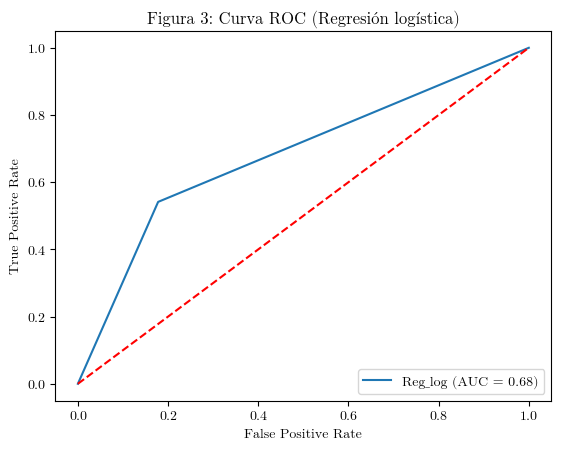

In [96]:
#Calculamos el área debajo de la curva ROC (su acumulado)
auc_ROC = roc_auc_score(y_test, y_predicha)
print('AUC: %.3f' % auc_ROC)

#Graficamos la curva ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_predicha)
np.set_printoptions(suppress = True)
print(thresholds)
print(fpr)
print(tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_ROC, estimator_name='Reg_log')
font = {'family': 'Latin Modern Math'}
plt.rc('font', **font)
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Figura 3: Curva ROC (Regresión logística)")
plt.savefig("roc_logit.png", dpi=300, bbox_inches='tight')
plt.show()

Análisis de discriminante lineal

In [97]:
#Realizamos el análisis discriminante lineal 
adl = LinearDiscriminantAnalysis(n_components=1)
adl = adl.fit(x_train, y_train)

#Predecimos con el modelo de análisis discriminante lineal sobre las x de testeo
y_test_pred_adl = adl.predict(x_test)
accuracy_adl = accuracy_score(y_test, y_test_pred_adl)
print("El accuracy del modelo es: %.2f" %accuracy_adl)

El accuracy del modelo es: 0.73


In [98]:
#Generamos la matriz de confusión
matriz_confusion_adl = confusion_matrix(y_test,y_test_pred_adl)

print('Confusion Matrix:')
print(matriz_confusion_adl)

Confusion Matrix:
[[646 135]
 [203 268]]


AUC: 0.698
[inf  1.  0.]
[0.         0.17285531 1.        ]
[0.         0.56900212 1.        ]


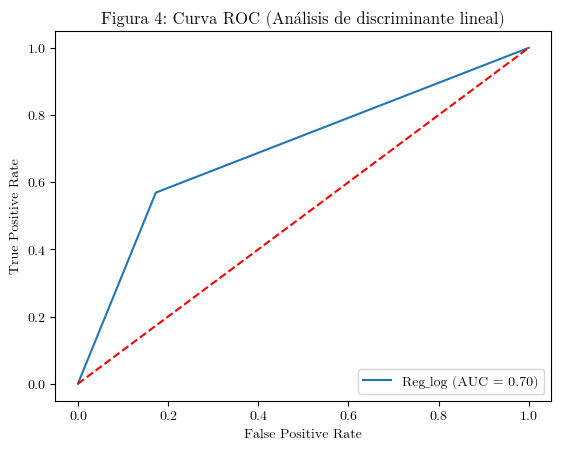

In [99]:
#Calculamos el área debajo de la curva ROC (su acumulado) para el método ADL 
auc_ROC_adl = roc_auc_score(y_test, y_test_pred_adl)
print('AUC: %.3f' % auc_ROC_adl)

#Graficamos la curva ROC 
fpr_adl, tpr_adl, thresholds_adl = roc_curve(y_test, y_test_pred_adl)
np.set_printoptions(suppress = True)
print(thresholds_adl)
print(fpr_adl)
print(tpr_adl)

display_adl = RocCurveDisplay(fpr=fpr_adl, tpr=tpr_adl, roc_auc=auc_ROC_adl, estimator_name='Reg_log')
font = {'family': 'Latin Modern Math'}
plt.rc('font', **font)
display_adl.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Figura 4: Curva ROC (Análisis de discriminante lineal)")
plt.savefig("roc_LDA.png", dpi=300, bbox_inches='tight')
plt.show()

In [100]:
#Realizamos el método de vecinos cercanos con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_test_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_test_pred_knn)
print("El accuracy del modelo es: %.3f" %accuracy_knn)

El accuracy del modelo es: 0.826


In [101]:
#Generamos la matriz de confusión
matriz_confusion_knn = confusion_matrix(y_test,y_test_pred_knn)

print('Confusion Matrix:')
print(matriz_confusion_knn)

Confusion Matrix:
[[658 123]
 [ 95 376]]


AUC: 0.820
[inf  1.  0.]
[0.        0.1574904 1.       ]
[0.         0.79830149 1.        ]


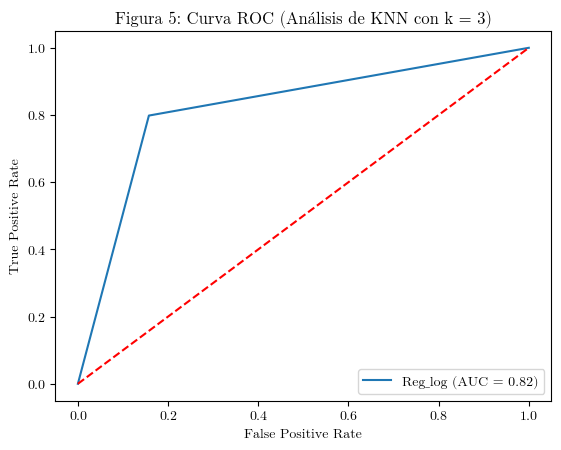

In [102]:
#Calculamos el área debajo de la curva ROC (su acumulado) para el método de vecinos cercanos 
auc_ROC_knn = roc_auc_score(y_test, y_test_pred_knn)
print('AUC: %.3f' % auc_ROC_knn)

#Graficamos la curva ROC 
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_pred_knn)
np.set_printoptions(suppress = True)
print(thresholds_knn)
print(fpr_knn)
print(tpr_knn)

display_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=auc_ROC_knn, estimator_name='Reg_log')
font = {'family': 'Latin Modern Math'}
plt.rc('font', **font)
display_knn.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Figura 5: Curva ROC (Análisis de KNN con k = 3)")
plt.savefig("roc_knn.png", dpi=300, bbox_inches='tight')
plt.show()

**Inciso 5**

In [103]:
#La mejor opción es el método de vecinos cercanos, por lo que predecimos la cantidad de "pobres" en la base no respondieron con este método.
x_nr = norespondieron_2
x_nr = sm.add_constant(x)
y_pred_norespondieron = knn.predict(x_nr)

#Contamos la cantidad de pobres que el método predice
pobres_pred = np.sum(y_pred_norespondieron)
print("La cantidad de pobres que el método predice en la muestra no respondieron es de :", pobres_pred)

#Calculamos la proporción de las personas que no respondieron que identificamos como pobres
pobres_prop = np.sum(y_pred_norespondieron)/len(y_pred_norespondieron)
print("La tasa de pobreza predicha en la muestra de no respondieron es de:", round(pobres_prop*100,2), "%")


La cantidad de pobres que el método predice en la muestra no respondieron es de : 1649
La tasa de pobreza predicha en la muestra de no respondieron es de: 39.52 %


**Inciso 6**

In [108]:
#Vemos las variables que hay en la base para seleccionar las que queremos en la estimación
columnas = respondieron_2.columns
print("Variables en la base de datos:")
for columna in columnas:
    print(columna)
    
#Dejamos las variables CH03 (Relación de parentesco), CH04 (Sexo), CH06 (Edad), CH07 (Estado civil), CH08 (Cobertura médica), CH09 (Saber leer o escribir), CH10 (Asistencia a establecimiento educativo), CH12 (Nivel educativo más alto cursado), CH16 (Dónde vivía hace 5 años), NIVEL_ED (Nivel Educativo), ESTADO (Condición de actividad), CAT_INAC (Categoría de inactividad), PP02H (Búsqueda de trabajo en los últimos 12 meses), PP02I (Si trabajó en algún momento en los últimos 12 meses),'pobre'
columnas_selec = ['CH03','CH04','CH06','CH07','CH08','CH09','CH10','CH12','CH16','NIVEL_ED','ESTADO','CAT_INAC','PP02H','PP02I','pobre']
respondieron_selec = respondieron_2[columnas_selec]

Variables en la base de datos:
index
ANO4
TRIMESTRE
NRO_HOGAR
COMPONENTE
H15
REGION
AGLOMERADO
PONDERA
CH03
CH04
CH06
CH07
CH08
CH09
CH10
CH11
CH12
CH13
CH15
CH16
NIVEL_ED
ESTADO
CAT_OCUP
CAT_INAC
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
pobre


In [109]:
respondieron_selec

,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH12,CH16,NIVEL_ED,ESTADO,CAT_INAC,PP02H,PP02I,pobre
0,1,2,65,1,1.0,1,2,2,1,2,3,1,2,2,0
1,2,1,70,1,1.0,1,2,2,1,2,1,0,0,0,0
2,1,1,36,1,4.0,1,2,4,1,4,1,0,0,0,1
3,2,2,28,1,4.0,1,2,4,1,4,1,0,0,0,1
4,3,2,9,5,4.0,1,1,2,1,1,4,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,3,1,5,5,4.0,2,1,1,6,7,4,5,0,0,1
4169,1,1,32,1,2.0,1,2,6,1,6,1,0,0,0,0
4170,2,2,38,1,2.0,1,2,6,1,6,1,0,0,0,0
4171,3,1,9,5,2.0,1,1,2,1,1,4,3,0,0,0


In [110]:
#Implementamos nuevamente el método logit
y2 = respondieron_selec["pobre"]
x2 = respondieron_selec[respondieron_selec.columns.drop("pobre")]
x2 = sm.add_constant(x)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2.loc[:,x2.columns!="const"],y2,test_size=0.3,random_state=201)
reg_logistica2 = LogisticRegression().fit(x2_train,y2_train)
pred_y_score2 = reg_logistica2.predict_proba(x2_test)[:,1]  

#Transformamos las probabilidades en Y con valores 1 o 0 (con el clasificador de Bayes)
y2_predicha = np.where(pred_y_score2 > 0.5, 1, pred_y_score2)
y2_predicha = np.where(pred_y_score2 <= 0.5, 0, y2_predicha)

#Generamos la matriz de confusión
matriz_confusion2 = confusion_matrix(y2_test, y2_predicha)
print('Confusion Matrix:')
print(matriz_confusion2) 
accuracy_log2= accuracy_score(y2_test, y2_predicha)
print('Accuracy Score :','%.3f' % accuracy_log2)

Confusion Matrix:
[[642 139]
 [216 255]]
Accuracy Score : 0.716


/Users/Victoria/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.682


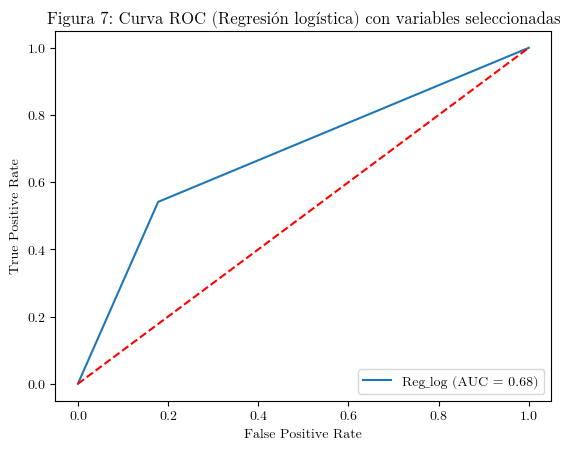

In [112]:
#Calculamos el área debajo de la curva ROC (su acumulado)
auc_ROC2 = roc_auc_score(y2_test, y2_predicha)
print('AUC: %.3f' % auc_ROC2)

#Graficamos la curva ROC 
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_predicha)
np.set_printoptions(suppress = True)

display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=auc_ROC2, estimator_name='Reg_log')
font = {'family': 'Latin Modern Math'}
plt.rc('font', **font)
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Figura 7: Curva ROC (Regresión logística) con variables seleccionadas")
plt.savefig("roc_logit2.png", dpi=300, bbox_inches='tight')
plt.show()